# Employee Attrition Analysis

In [1]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np                          # for numerical computation

In [2]:
# Task 1

data = pd.read_csv('DS1_C5_S1_EmployeeAttrition_Data_Practice.csv')

df = pd.DataFrame(data)
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,...,Yes,3,1,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,Research & Development,8,Life Sciences,2,3,Male,61,...,No,4,4,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,Research & Development,2,Other,4,4,Male,92,...,Yes,3,2,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,Research & Development,3,Life Sciences,5,4,Female,56,...,Yes,3,3,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,Research & Development,2,Medical,7,1,Male,40,...,No,3,4,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,No,NaN,Research & Development,23,Medical,2061,3,Male,41,...,No,3,3,17,3,3,5,2,0,3
1466,39.0,No,Travel_Rarely,Research & Development,6,Medical,2062,4,Male,42,...,No,3,1,9,5,3,7,7,1,7
1467,27.0,No,Travel_Rarely,Research & Development,4,Life Sciences,2064,2,Male,87,...,Yes,4,2,6,0,3,6,2,0,3
1468,49.0,No,Travel_Frequently,Sales,2,Medical,2065,4,Male,63,...,No,3,4,17,3,2,9,6,0,8


In [3]:
# Display column names

df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
# Count of non-null records and datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1446 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1440 non-null   object 
 3   Department                1466 non-null   object 
 4   DistanceFromHome          1470 non-null   int64  
 5   EducationField            1458 non-null   object 
 6   EmployeeNumber            1470 non-null   int64  
 7   EnvironmentSatisfaction   1470 non-null   int64  
 8   Gender                    1425 non-null   object 
 9   HourlyRate                1470 non-null   int64  
 10  JobInvolvement            1470 non-null   int64  
 11  JobRole                   1460 non-null   object 
 12  JobSatisfaction           1470 non-null   int64  
 13  MaritalStatus             1414 non-null   object 
 14  MonthlyI

In [5]:
# Display count of missing values

df.isnull().sum()

Age                         24
Attrition                    0
BusinessTravel              30
Department                   4
DistanceFromHome             0
EducationField              12
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                      45
HourlyRate                   0
JobInvolvement               0
JobRole                     10
JobSatisfaction              0
MaritalStatus               56
MonthlyIncome                0
NumCompaniesWorked           0
Over18                      54
OverTime                     0
PerformanceRating            0
RelationshipSatisfaction     0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
dtype: int64

# Task 2

In [6]:


# Seprating out the categorical and continuous variables
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 10:       # nunique:  returns unique values in the column,
                                                    #here 10 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical               continuous
------------------------  -----------------------
Attrition                 Age
BusinessTravel            DistanceFromHome
Department                EmployeeNumber
EducationField            HourlyRate
EnvironmentSatisfaction   MonthlyIncome
Gender                    NumCompaniesWorked
JobInvolvement            TotalWorkingYears
JobRole                   YearsAtCompany
JobSatisfaction           YearsInCurrentRole
MaritalStatus             YearsSinceLastPromotion
Over18                    YearsWithCurrManager
OverTime
PerformanceRating
RelationshipSatisfaction
TrainingTimesLastYear
WorkLifeBalance


# Task 3

# $$\;\;\;\; Univariate \ Analysis \ of \ Categorical \ Variables$$

### User-defined function for level 1 analysis of categorical columns
This function will check for the following: \
Unique values \
Mode \
Total count of missing values 

In [7]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
      

## 1. Analysis of Attrition: If the account is closed, then Attired Customer else Existing Customer


In [8]:
info_of_cat("Attrition")

Unique values in Attrition are: ['Yes' 'No']
Mode of Attrition is No
Number of missing values in Attrition is 0


###### Interpretation: Attrition is a nominal datatype.

## 2. Analysis of  Business Travel: Frequent or Rare


In [9]:
info_of_cat("BusinessTravel")

Unique values in BusinessTravel are: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel' nan]
Mode of BusinessTravel is Travel_Rarely
Number of missing values in BusinessTravel is 30


######  Business Travel is a nominal datatype. (Categorical)

### Missing Value treatment using Mode

In [10]:
BusinessTravel_mode = df.BusinessTravel.mode()[0]
print(BusinessTravel_mode)
df["BusinessTravel"].fillna(BusinessTravel_mode, inplace = True)

Travel_Rarely


###### Interpretation: Most of the employees travel rarely.

## 3. Analysis of  Department Column


In [11]:
info_of_cat("Department")

Unique values in Department are: ['Sales' 'Research & Development' 'Human Resources' nan]
Mode of Department is Research & Development
Number of missing values in Department is 4


### Missing Value treatment using Mode

In [12]:
Department_mode = df.Department.mode()[0]
print(Department_mode)
df["Department"].fillna(Department_mode, inplace = True)

Research & Development


###### Interpretation: Most of the employees are in Research & Development Department.

## 4. Analysis of  Education Field Column


In [13]:
info_of_cat("EducationField")

Unique values in EducationField are: ['Life Sciences' 'Other' 'Medical' 'Marketing' nan 'Technical Degree'
 'Human Resources']
Mode of EducationField is Life Sciences
Number of missing values in EducationField is 12


### Missing Value treatment using Mode

In [14]:
EducationField_mode = df.EducationField.mode()[0]
print(EducationField_mode)
df["EducationField"].fillna(EducationField_mode, inplace = True)

Life Sciences


###### Interpretation: Education Field of most employees are Life Sciences

## 5. Analysis of  Environment Satisfaction  Column


In [15]:
info_of_cat("EnvironmentSatisfaction")

Unique values in EnvironmentSatisfaction are: [2 3 4 1]
Mode of EnvironmentSatisfaction is 3
Number of missing values in EnvironmentSatisfaction is 0


###### Interpretation: Most employees have rated 3 for environment satisfaction

## 6. Analysis of Gender Column


In [16]:
info_of_cat("Gender")

Unique values in Gender are: ['Female' 'Male' nan]
Mode of Gender is Male
Number of missing values in Gender is 45


### Missing Value treatment using Mode

In [17]:
gender_mode = df.Gender.mode()[0]
print(gender_mode)
df["Gender"].fillna(gender_mode, inplace = True)

Male


## 7. Analysis of Job Involvement Column


In [18]:
info_of_cat("JobInvolvement")

Unique values in JobInvolvement are: [3 2 4 1]
Mode of JobInvolvement is 3
Number of missing values in JobInvolvement is 0


## 8. Analysis of Job Role Column


In [19]:
info_of_cat("JobRole")

Unique values in JobRole are: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' nan 'Human Resources']
Mode of JobRole is Sales Executive
Number of missing values in JobRole is 10


### Missing Value treatment using Mode

In [20]:
jobrole_mode = df.JobRole.mode()[0]
print(jobrole_mode)
df["JobRole"].fillna(jobrole_mode, inplace = True)

Sales Executive


## 9. Analysis of Job Satisfaction Column


In [21]:
info_of_cat("JobSatisfaction")

Unique values in JobSatisfaction are: [4 2 3 1]
Mode of JobSatisfaction is 4
Number of missing values in JobSatisfaction is 0


## 10. Analysis of Marital Status Column


In [22]:
info_of_cat("MaritalStatus")

Unique values in MaritalStatus are: ['Single' 'Married' nan 'Divorced']
Mode of MaritalStatus is Married
Number of missing values in MaritalStatus is 56


### Missing Value treatment using Mode

In [23]:
MaritalStatus_mode = df.MaritalStatus.mode()[0]
print(MaritalStatus_mode)
df["MaritalStatus"].fillna(MaritalStatus_mode, inplace = True)

Married


## 11. Analysis of Over 18 age Column


In [24]:
info_of_cat("Over18")

Unique values in Over18 are: ['Y' nan]
Mode of Over18 is Y
Number of missing values in Over18 is 54


### Missing Value treatment using Mode

In [25]:
Over18_mode = df.Over18.mode()[0]
print(Over18_mode)
df["Over18"].fillna(Over18_mode, inplace = True)

Y


## 12. Analysis of Over Time Column


In [26]:
info_of_cat("OverTime")

Unique values in OverTime are: ['Yes' 'No']
Mode of OverTime is No
Number of missing values in OverTime is 0


## 13. Analysis of Performance Rating Column


In [27]:
info_of_cat("PerformanceRating")

Unique values in PerformanceRating are: [3 4]
Mode of PerformanceRating is 3
Number of missing values in PerformanceRating is 0


## 14. Analysis of Relationship Satisfaction Column


In [28]:
info_of_cat("RelationshipSatisfaction")

Unique values in RelationshipSatisfaction are: [1 4 2 3]
Mode of RelationshipSatisfaction is 3
Number of missing values in RelationshipSatisfaction is 0


## 15. Analysis of Training Times Last Year Column


In [29]:
info_of_cat("TrainingTimesLastYear")

Unique values in TrainingTimesLastYear are: [0 3 2 5 1 4 6]
Mode of TrainingTimesLastYear is 2
Number of missing values in TrainingTimesLastYear is 0


## 16. Analysis of WorkLife Balance Column


In [30]:
info_of_cat("WorkLifeBalance")

Unique values in WorkLifeBalance are: [1 3 2 4]
Mode of WorkLifeBalance is 3
Number of missing values in WorkLifeBalance is 0


# Task 4

# $$\;\;\;\;Univariate \ Analysis \ of \ Categorical \ Variables \ Using Graphs$$

## 1.  Visual presentation of Attrition  attribute


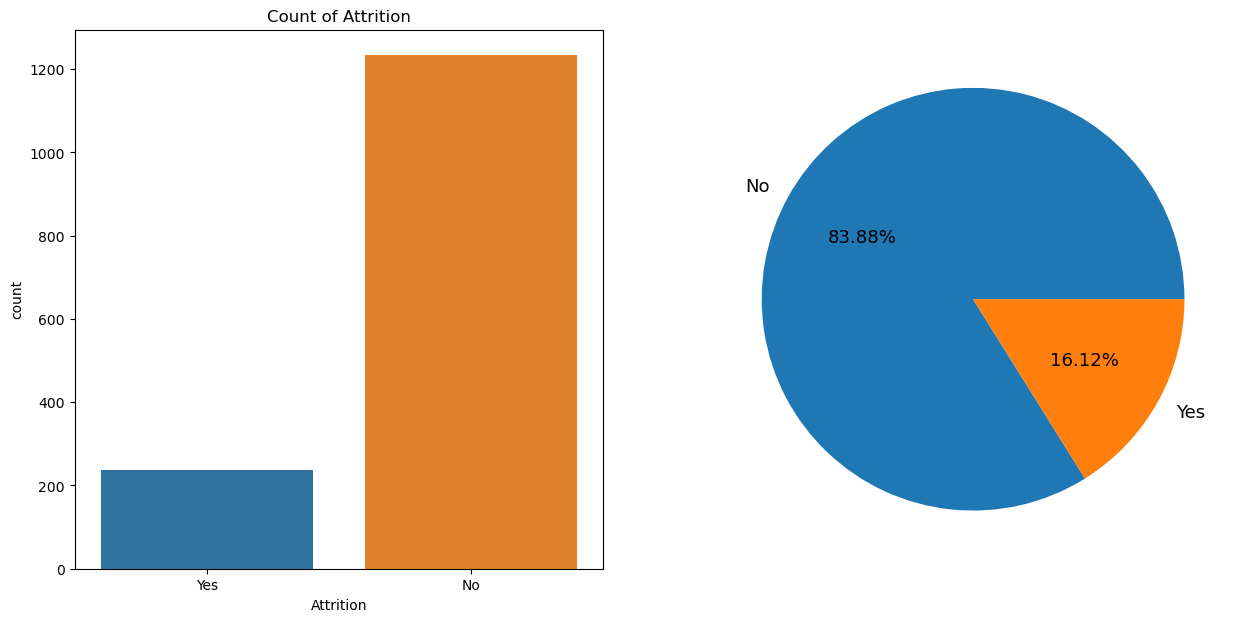

In [31]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Attrition")                  # Set the title of the graph
percentage = df["Attrition"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Attrition"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["Attrition"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})  # autopct: to print the percentage on pie wedge. 2 decimal points used 
plt.show()

## ***Interpretation:  The dataset indicates that 16% of the employees left the company while 84% of the employees are still with it.

## 2.  Visual presentation of Business Travel  attribute


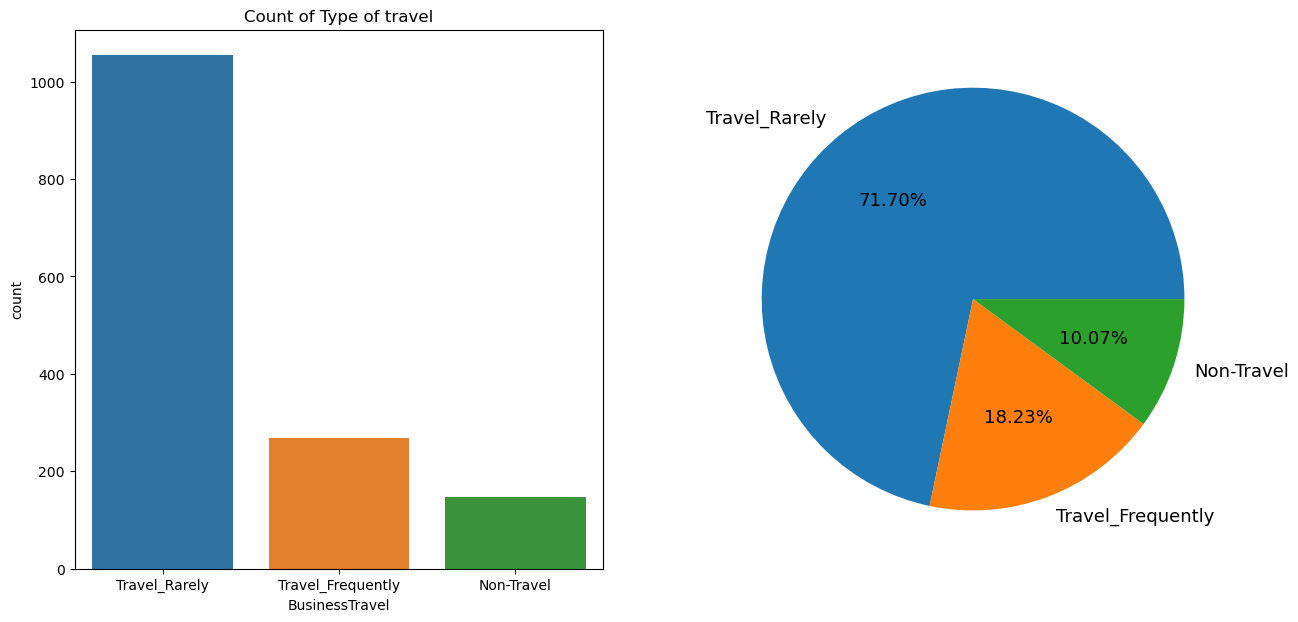

In [32]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Type of travel")                  
percentage = df["BusinessTravel"].value_counts()         
labels = list(df["BusinessTravel"].value_counts().index) 

sns.countplot(x = df["BusinessTravel"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})   
plt.show()

## ***Interpretation:  The dataset indicates that only 18.23% of the employees travel frequently, 10% of employees dont travel and 71%  employees travel rarely

## 3.  Visual presentation of Department  attribute


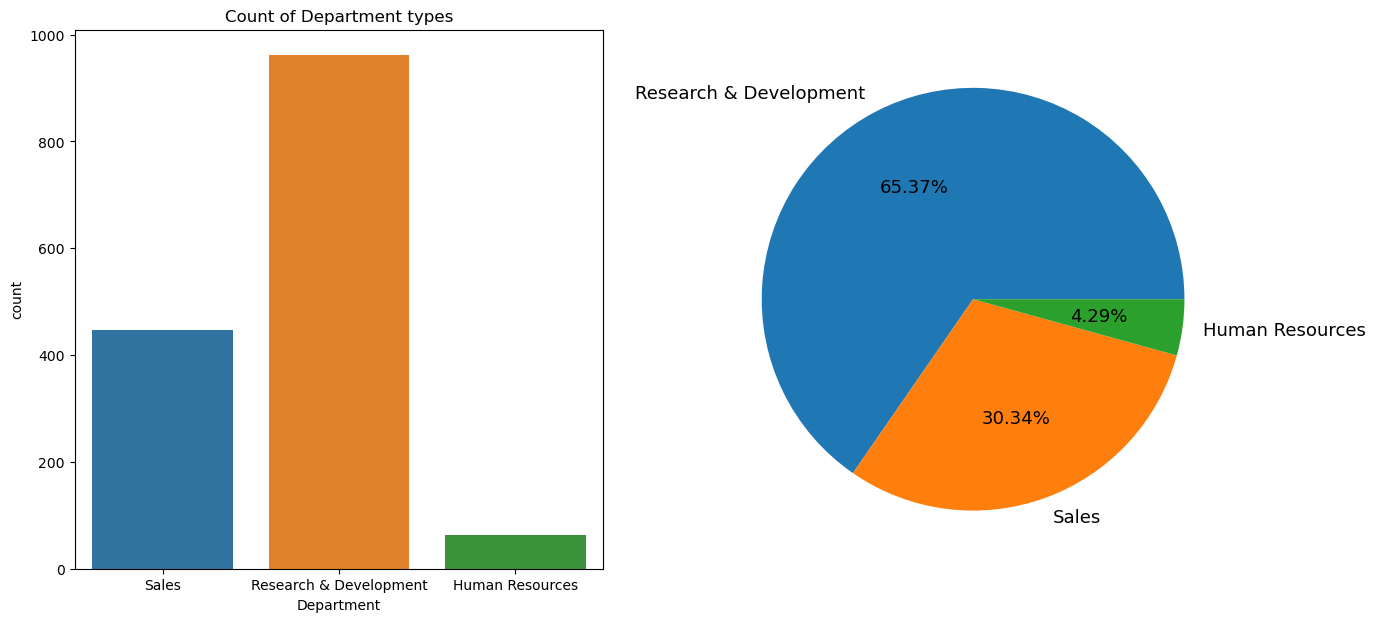

In [33]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Department types")                  
percentage = df["Department"].value_counts()         
labels = list(df["Department"].value_counts().index) 

sns.countplot(x = df["Department"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})   
plt.show()

## ***Interpretation:  The dataset indicates that most of the employees are in Research & Development department with 65.37% and least number of employees are in Human Resources with 4.29%. Sales department has 30.34% of employees

## 4.  Visual presentation of Education Field attribute


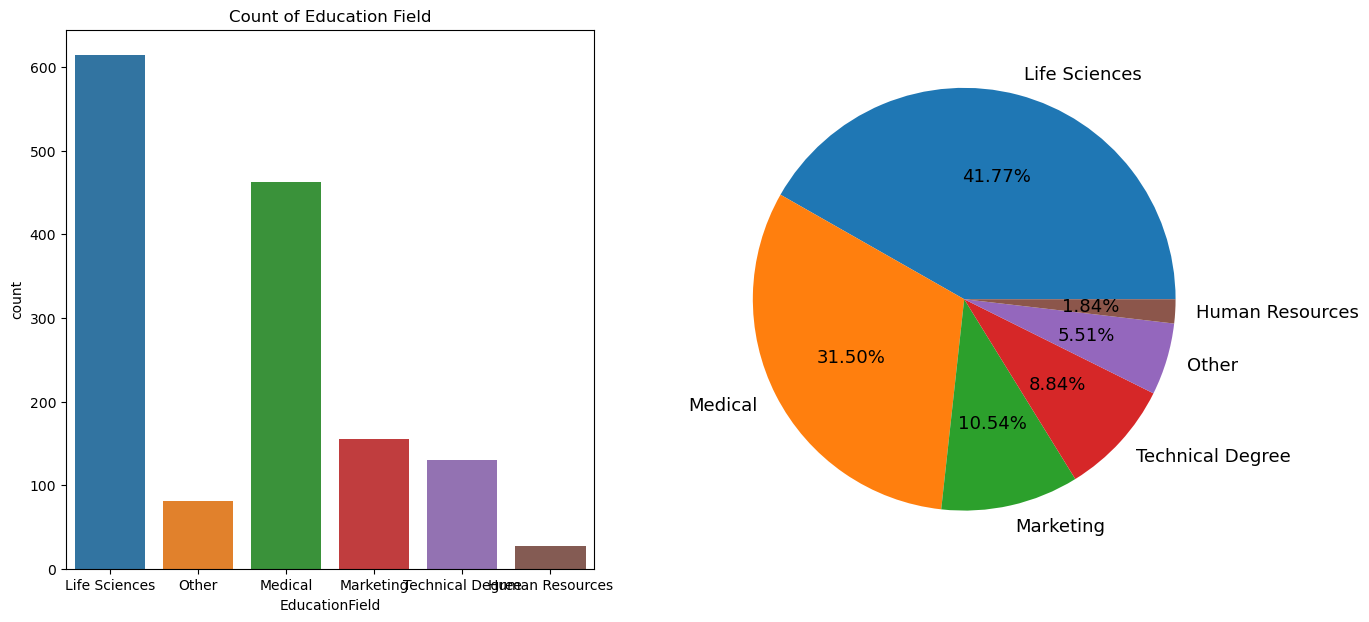

In [34]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Education Field")                  
percentage = df["EducationField"].value_counts()         
labels = list(df["EducationField"].value_counts().index) 

sns.countplot(x = df["EducationField"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})   
plt.show()

## ***Interpretation:  The dataset indicates that most of the employees have their education feild as Life sciences at 41.77%. The least number of employees have their education field as Human Resources at 1.84%

## 5.  Visual presentation of Environment Satisfaction attribute


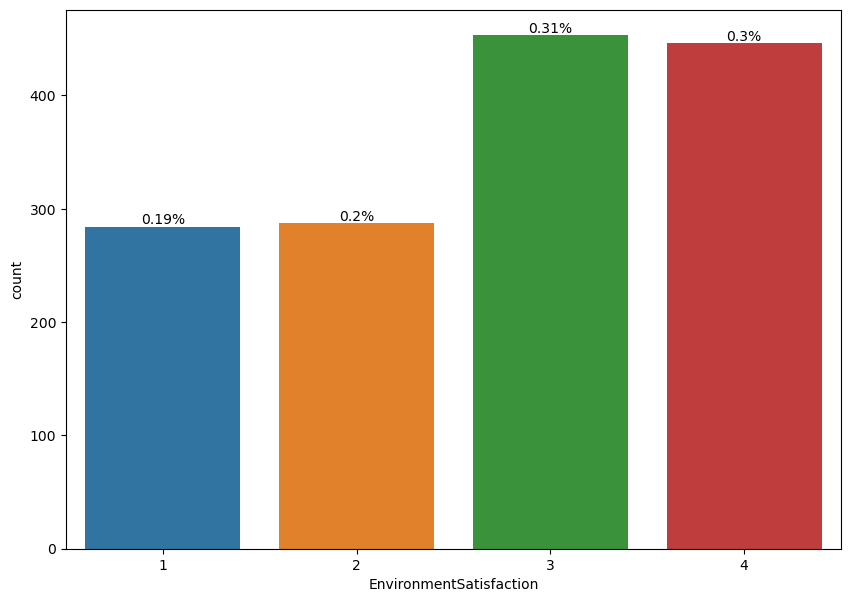

In [35]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["EnvironmentSatisfaction"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height() /len(df), 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

## ***Interpretation:  The dataset indicates that 0.31% of employees chose Environment satisfaction as 3 and 0.19% as 1.

## 6.  Visual presentation of Gender attribute


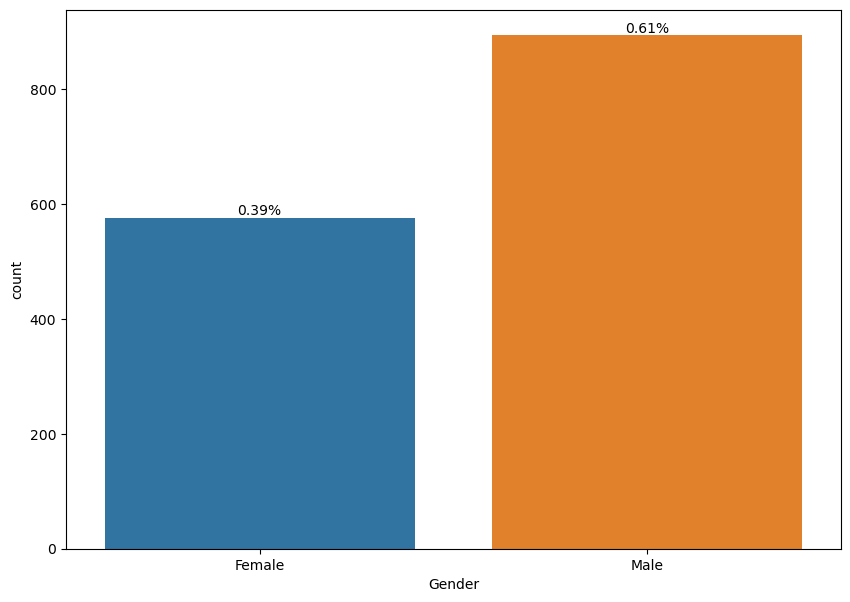

In [36]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["Gender"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height() /len(df), 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

## ***Interpretation:  The dataset indicates that Male employees are more contributing to 0.61%

## 7.  Visual presentation of Marital Status attribute


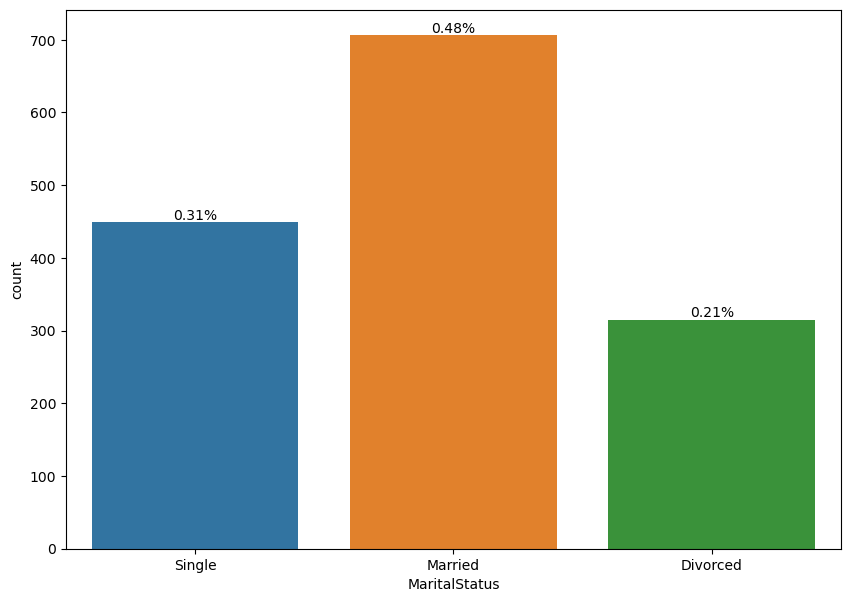

In [37]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["MaritalStatus"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height() /len(df), 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

## ***Interpretation:  The dataset indicates that most of the employees are Married contributing to 0.48%

## 8.  Visual presentation of Overtime attribute


No     71.70068
Yes    28.29932
Name: OverTime, dtype: float64


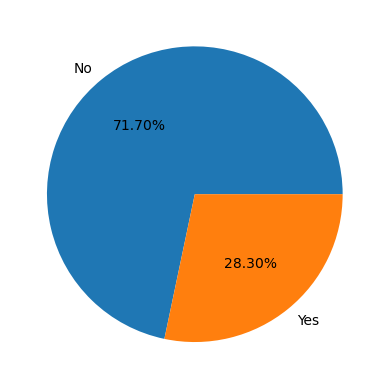

In [38]:

percentage = (df["OverTime"].value_counts()/len(df))*100      # value count is a function to calulate the number of the column marital status 
                                                                        #keeping its classes as index. 
print(percentage)

labels = list(df["OverTime"].value_counts().index)            # value_counts returns the count of the classes present in the marital status and its index which is the class name 
                                                                         # is accessed by the index; in sequence format and then converted into the list. 
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")           # autpct: is the way how the number would print on the graph.
plt.show()  

## ***Interpretation:  The dataset indicates that only 28.30% of employees work overtime.

## 9.  Visual presentation of Performance Rating attribute


3    84.62585
4    15.37415
Name: PerformanceRating, dtype: float64


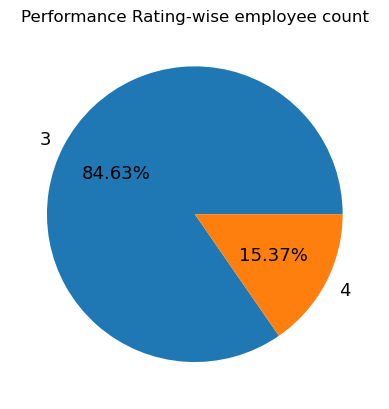

In [39]:

percentage = (df["PerformanceRating"].value_counts()/len(df))*100      # value count is a function to calulate the number of the column marital status 
                                                                        #keeping its classes as index. 
print(percentage)

labels = list(df["PerformanceRating"].value_counts().index)            # value_counts returns the count of the classes present in the marital status and its index which is the class name 
                                                                         # is accessed by the index; in sequence format and then converted into the list. 
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})           # autpct: is the way how the number would print on the graph.
plt.title('Performance Rating-wise employee count')
plt.show()  

## ***Interpretation:  The dataset indicates that the highest number of employees fall under performance rating of 3 contributing to 84.63%

## 10.  Visual presentation of WorkLife Balance attribute


3    60.748299
2    23.401361
4    10.408163
1     5.442177
Name: WorkLifeBalance, dtype: float64


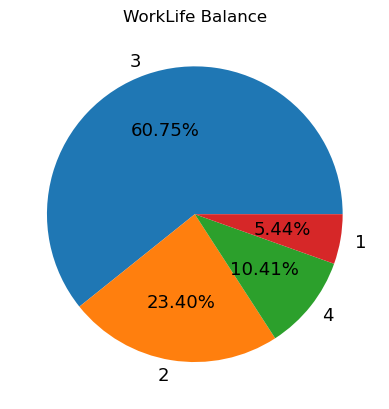

In [40]:

percentage = (df["WorkLifeBalance"].value_counts()/len(df))*100      # value count is a function to calulate the number of the column marital status 
                                                                        #keeping its classes as index. 
print(percentage)

labels = list(df["WorkLifeBalance"].value_counts().index)            # value_counts returns the count of the classes present in the marital status and its index which is the class name 
                                                                         # is accessed by the index; in sequence format and then converted into the list. 
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})           # autpct: is the way how the number would print on the graph.
plt.title('WorkLife Balance')
plt.show() 

## ***Interpretation:  The dataset indicates that the maximum number of employees fall under the score of 3 for worklife balance contributing to 60.75%

## 11.  Visual presentation of Job Involvement attribute


3    59.047619
2    25.510204
4     9.795918
1     5.646259
Name: JobInvolvement, dtype: float64


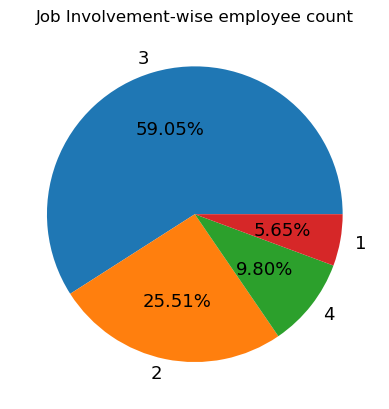

In [41]:

percentage = (df["JobInvolvement"].value_counts()/len(df))*100      # value count is a function to calulate the number of the column marital status 
                                                                        #keeping its classes as index. 
print(percentage)

labels = list(df["JobInvolvement"].value_counts().index)            # value_counts returns the count of the classes present in the marital status and its index which is the class name 
                                                                         # is accessed by the index; in sequence format and then converted into the list. 
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})           # autpct: is the way how the number would print on the graph.
plt.title('Job Involvement-wise employee count')
plt.show() 

## ***Interpretation:  The dataset indicates that the maximum number of employees fall under the score of 3 for worklife balance contributing to 60.75%

## 12.  Visual presentation of Job Role attribute


Sales Executive              22.653061
Research Scientist           19.659864
Laboratory Technician        17.619048
Manufacturing Director        9.795918
Healthcare Representative     8.843537
Manager                       6.870748
Sales Representative          5.646259
Research Director             5.374150
Human Resources               3.537415
Name: JobRole, dtype: float64


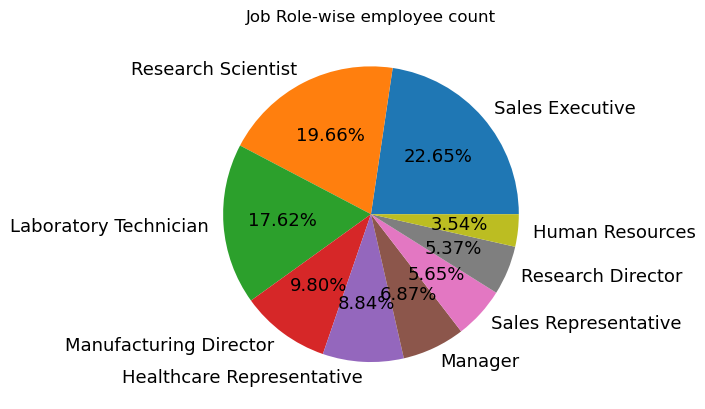

In [42]:

percentage = (df["JobRole"].value_counts()/len(df))*100      # value count is a function to calulate the number of the column marital status 
                                                                        #keeping its classes as index. 
print(percentage)

labels = list(df["JobRole"].value_counts().index)            # value_counts returns the count of the classes present in the marital status and its index which is the class name 
                                                                         # is accessed by the index; in sequence format and then converted into the list. 
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})           # autpct: is the way how the number would print on the graph.
plt.title('Job Role-wise employee count')
plt.show() 

## ***Interpretation:  The dataset indicates that the maximum number of employees fall under Sales Executive job role with 22.65%. The least number of employees fall under Human Resources with 3.54%.

## 13.  Visual presentation of Job Satisfaction attribute


4    31.224490
3    30.068027
1    19.659864
2    19.047619
Name: JobSatisfaction, dtype: float64


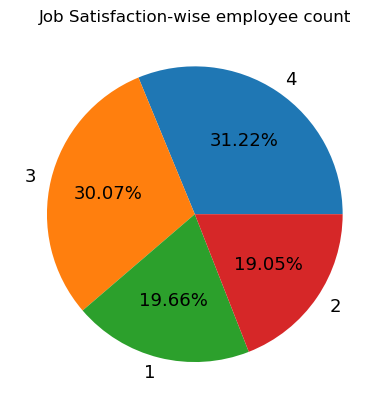

In [43]:

percentage = (df["JobSatisfaction"].value_counts()/len(df))*100      # value count is a function to calulate the number of the column marital status 
                                                                        #keeping its classes as index. 
print(percentage)

labels = list(df["JobSatisfaction"].value_counts().index)            # value_counts returns the count of the classes present in the marital status and its index which is the class name 
                                                                         # is accessed by the index; in sequence format and then converted into the list. 
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})           # autpct: is the way how the number would print on the graph.
plt.title('Job Satisfaction-wise employee count')
plt.show() 

## ***Interpretation:  The dataset indicates that the maximum number of employees fall under the satisfaction score of 4 contributing to 31.22%

## 14.  Visual presentation of Over 18 years attribute


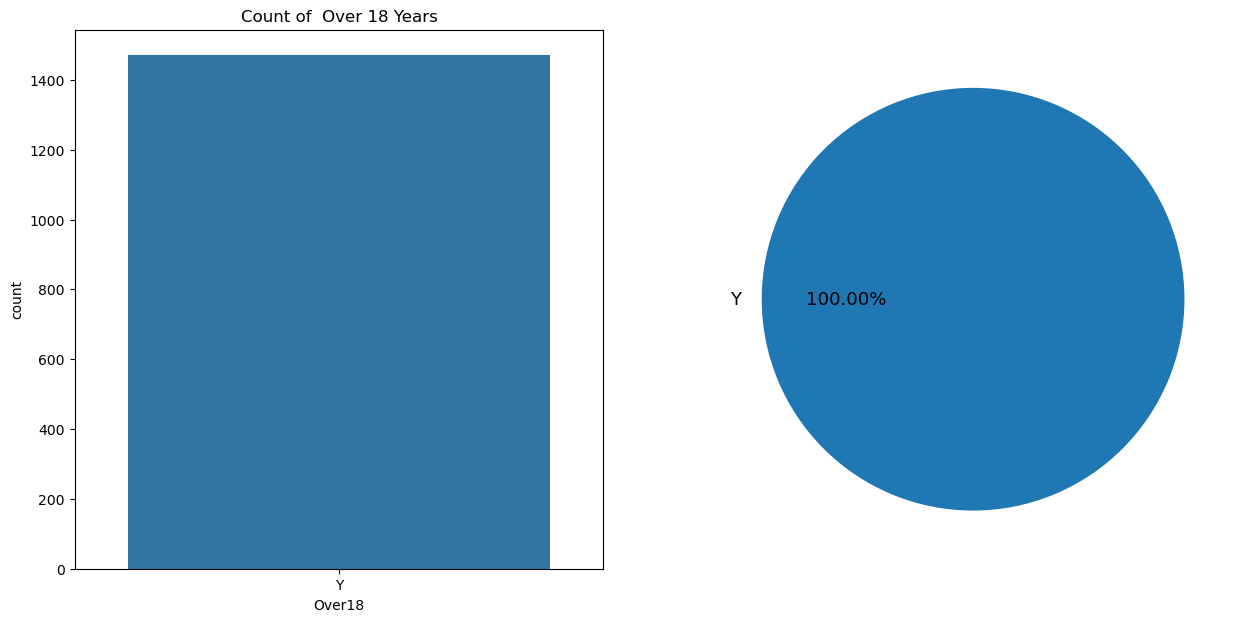

In [44]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of  Over 18 Years")                  
percentage = df["Over18"].value_counts()         
labels = list(df["Over18"].value_counts().index) 

sns.countplot(x = df["Over18"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})   
plt.show()

## ***Interpretation:  The dataset indicates that all employees are above 18 years of age

## 15.  Visual presentation of Relationship Satisfaction attribute


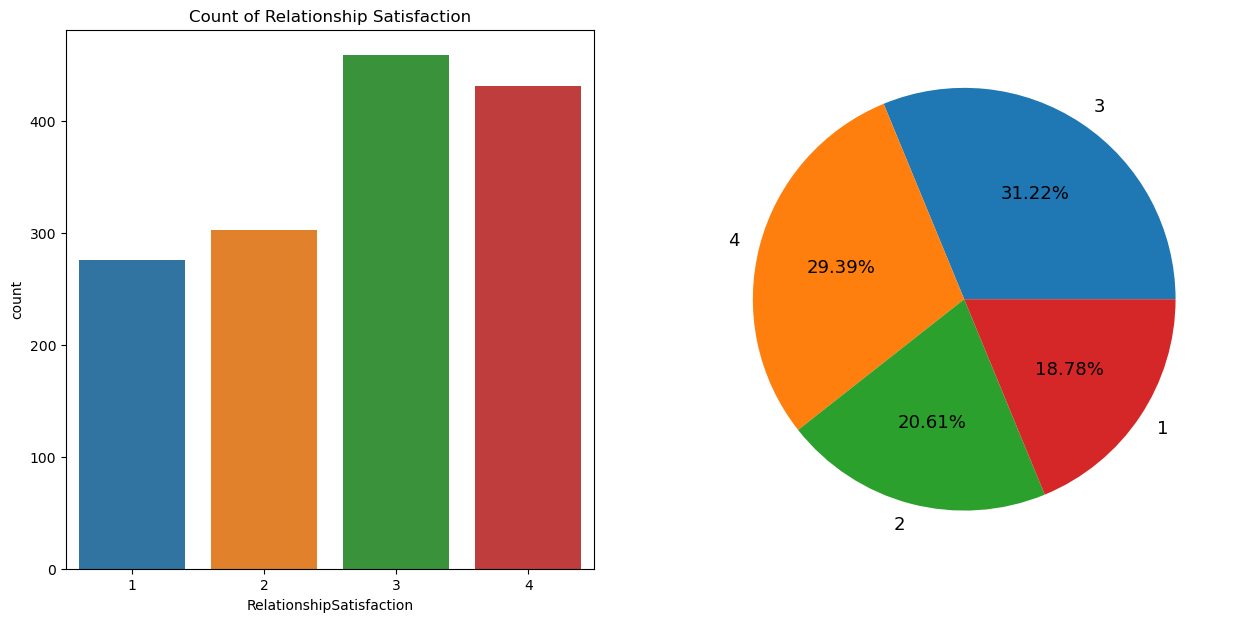

In [45]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Relationship Satisfaction")                  
percentage = df["RelationshipSatisfaction"].value_counts()         
labels = list(df["RelationshipSatisfaction"].value_counts().index) 

sns.countplot(x = df["RelationshipSatisfaction"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})   
plt.show()

## ***Interpretation:  The dataset indicates that employees are highest in Relationship satisfaction score of 3 with 31.22%

## 16.  Visual presentation of Training Times Last Year attribute


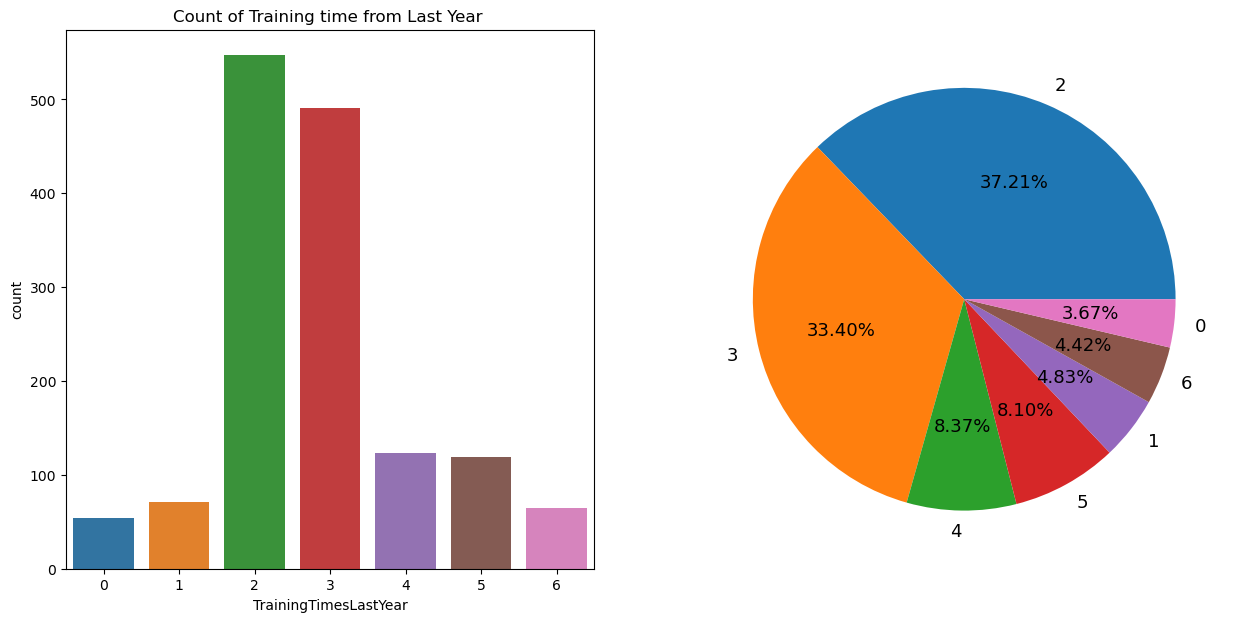

In [46]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Training time from Last Year ")                  
percentage = df["TrainingTimesLastYear"].value_counts()         
labels = list(df["TrainingTimesLastYear"].value_counts().index) 

sns.countplot(x = df["TrainingTimesLastYear"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})   
plt.show()

## ***Interpretation:  Highest number of employees were trained 2 times since last year. Next highest is 3

# Task 5

# $$\;\;\;\;\;\;Univariate \ Analysis \ of \ Numerical \ Variables$$

## User defined function for calculating mean, median, mode,  standard deviation, count of all null values and show the skewness of data

In [47]:
from scipy.stats import skew

def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")
    print(f"The Skewness of the {col} is {df[col].skew()}")

## 1.  Analysis of Employee Age Column


In [48]:
info_of_numerical("Age")

The mean of the Age is 36.93015214384509
The median of the Age is 36.0
The mode of the Age is 34.0
The standard deviation of the Age is 9.16220404447615
Number of missing values in the Age is 24
The Skewness of the Age is 0.4090238232052275


### Missing Value treatment using Mode

In [49]:
Age_mode = df.Age.mode()[0]
print(Age_mode)
df["Age"].fillna(Age_mode, inplace = True)

34.0


## 2.  Analysis of Distance From Home Column


In [50]:
info_of_numerical("DistanceFromHome")

The mean of the DistanceFromHome is 9.19251700680272
The median of the DistanceFromHome is 7.0
The mode of the DistanceFromHome is 2
The standard deviation of the DistanceFromHome is 8.106864435666084
Number of missing values in the DistanceFromHome is 0
The Skewness of the DistanceFromHome is 0.9581179956568269


## 3.  Analysis of Employee Number Column


In [51]:
info_of_numerical("EmployeeNumber")

The mean of the EmployeeNumber is 1024.865306122449
The median of the EmployeeNumber is 1020.5
The mode of the EmployeeNumber is 1
The standard deviation of the EmployeeNumber is 602.024334847475
Number of missing values in the EmployeeNumber is 0
The Skewness of the EmployeeNumber is 0.016574019580105036


## 4.  Analysis of Hourly Rate Column


In [52]:
info_of_numerical("HourlyRate")

The mean of the HourlyRate is 65.89115646258503
The median of the HourlyRate is 66.0
The mode of the HourlyRate is 66
The standard deviation of the HourlyRate is 20.329427593996158
Number of missing values in the HourlyRate is 0
The Skewness of the HourlyRate is -0.03231095290044942


## 5.  Analysis of Monthly Income Column


In [53]:
info_of_numerical("MonthlyIncome")

The mean of the MonthlyIncome is 6502.931292517007
The median of the MonthlyIncome is 4919.0
The mode of the MonthlyIncome is 2342
The standard deviation of the MonthlyIncome is 4707.956783097995
Number of missing values in the MonthlyIncome is 0
The Skewness of the MonthlyIncome is 1.3698166808390662


## 6.  Analysis of Number of companies worked Column


In [54]:
info_of_numerical("NumCompaniesWorked")

The mean of the NumCompaniesWorked is 2.6931972789115646
The median of the NumCompaniesWorked is 2.0
The mode of the NumCompaniesWorked is 1
The standard deviation of the NumCompaniesWorked is 2.498009006070751
Number of missing values in the NumCompaniesWorked is 0
The Skewness of the NumCompaniesWorked is 1.026471111968205


## 7.  Analysis of Total Working Years Column


In [55]:
info_of_numerical("TotalWorkingYears")

The mean of the TotalWorkingYears is 11.279591836734694
The median of the TotalWorkingYears is 10.0
The mode of the TotalWorkingYears is 10
The standard deviation of the TotalWorkingYears is 7.780781675515004
Number of missing values in the TotalWorkingYears is 0
The Skewness of the TotalWorkingYears is 1.1171718528128527


## 8.  Analysis of Years at Company Column


In [56]:
info_of_numerical("YearsAtCompany")

The mean of the YearsAtCompany is 7.0081632653061225
The median of the YearsAtCompany is 5.0
The mode of the YearsAtCompany is 5
The standard deviation of the YearsAtCompany is 6.126525152403566
Number of missing values in the YearsAtCompany is 0
The Skewness of the YearsAtCompany is 1.7645294543422085


## 9.  Analysis of Years in Current Role Column


In [57]:
info_of_numerical("YearsInCurrentRole")

The mean of the YearsInCurrentRole is 4.229251700680272
The median of the YearsInCurrentRole is 3.0
The mode of the YearsInCurrentRole is 2
The standard deviation of the YearsInCurrentRole is 3.6231370346706395
Number of missing values in the YearsInCurrentRole is 0
The Skewness of the YearsInCurrentRole is 0.9173631562908262


## 10.  Analysis of Years since last promotion Column


In [58]:
info_of_numerical("YearsSinceLastPromotion")

The mean of the YearsSinceLastPromotion is 2.1877551020408164
The median of the YearsSinceLastPromotion is 1.0
The mode of the YearsSinceLastPromotion is 0
The standard deviation of the YearsSinceLastPromotion is 3.222430279137968
Number of missing values in the YearsSinceLastPromotion is 0
The Skewness of the YearsSinceLastPromotion is 1.9842899833524859


## 11.  Analysis of Years with current manager Column


In [59]:
info_of_numerical("YearsWithCurrManager")

The mean of the YearsWithCurrManager is 4.12312925170068
The median of the YearsWithCurrManager is 3.0
The mode of the YearsWithCurrManager is 2
The standard deviation of the YearsWithCurrManager is 3.5681361205404407
Number of missing values in the YearsWithCurrManager is 0
The Skewness of the YearsWithCurrManager is 0.8334509919918475


# Task 6

## 1. Descriptive Analysis of Employee Age Column using graph


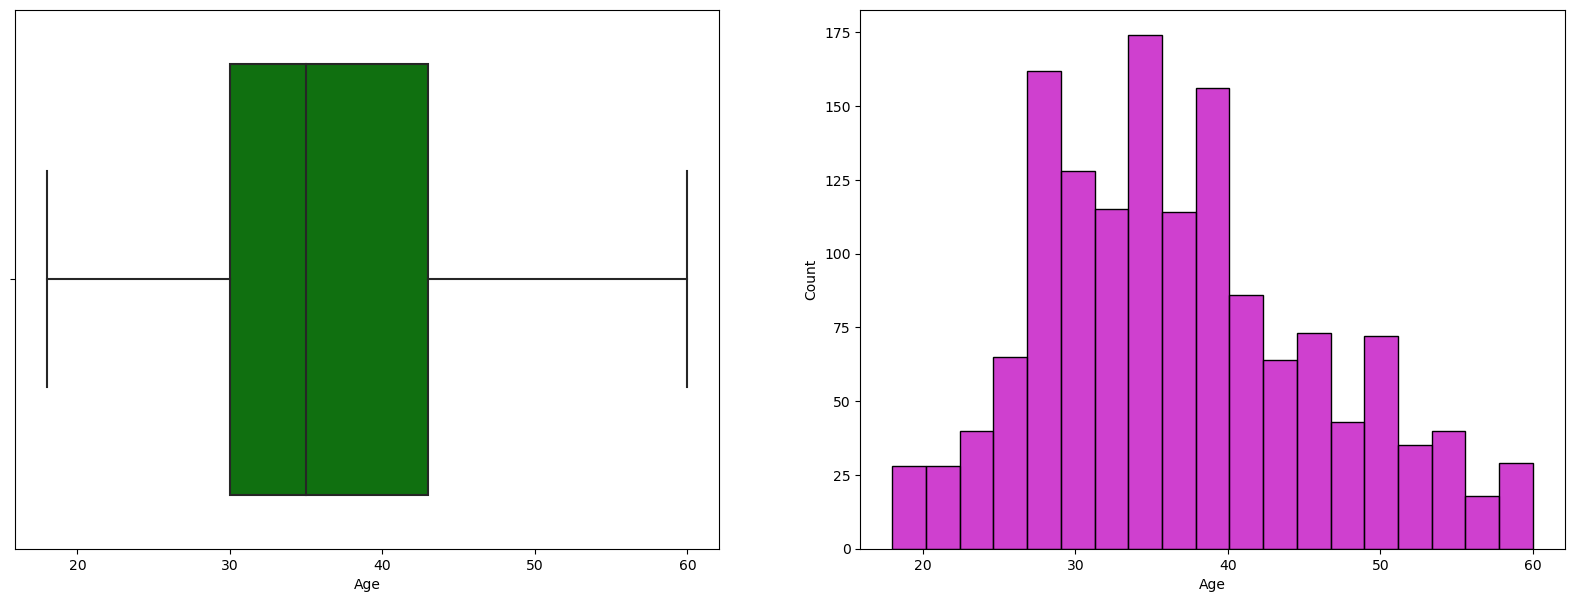

In [60]:
# Distribution of Employee_Age
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["Age"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["Age"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In this case, the employee age is distributed normally and there are no outliers in the data as well. Age ranges from 20 to 60.


## 2. Descriptive Analysis of Hourly Rate Column using graph


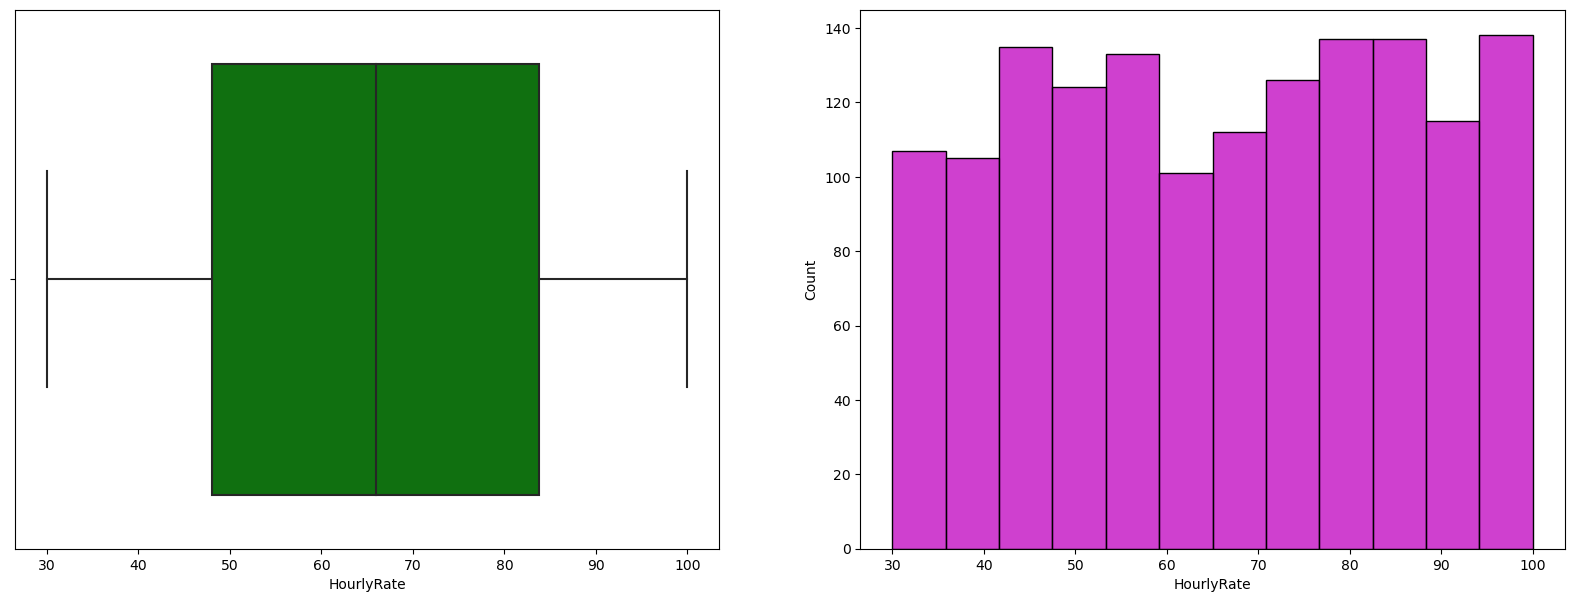

In [61]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["HourlyRate"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["HourlyRate"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In this case, the Hourly Rate of employees are distributed normally and there are no outliers in the data as well. Hourly Rate ranges from 30 to 100.


## 3. Descriptive Analysis of Monthly Income Column using graph


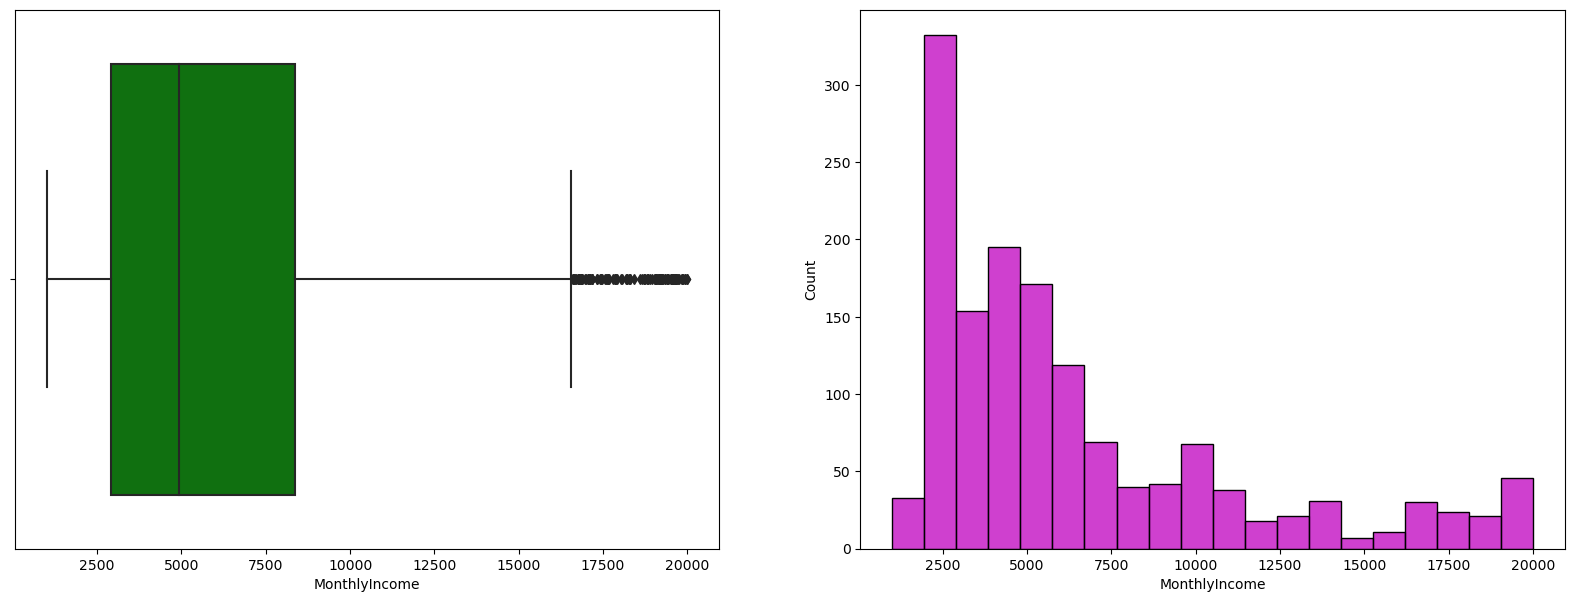

In [62]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["MonthlyIncome"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["MonthlyIncome"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In this case, the Monthly Income of employees are right skewed and most of the data is distributed toward the left. There are upper outiers in the salary data.


## Outliers Analysis and Treatment:
Employee salaries above 11000 are outliers. To treat the outliers, their salary is replaced by the mean. This is not the only solution to treat the outliers. Machine learning can help in this scenario.

In [63]:
mean = int(df.MonthlyIncome.mean())
# accessing the data higher than 11000
x = df[df["MonthlyIncome"] > 11000].index
for index in x:
    df.loc[index, "MonthlyIncome"] = mean

In [64]:
info_of_numerical("MonthlyIncome")

The mean of the MonthlyIncome is 5092.926530612245
The median of the MonthlyIncome is 4919.0
The mode of the MonthlyIncome is 6502
The standard deviation of the MonthlyIncome is 2343.8590870737216
Number of missing values in the MonthlyIncome is 0
The Skewness of the MonthlyIncome is 0.5527475432861302


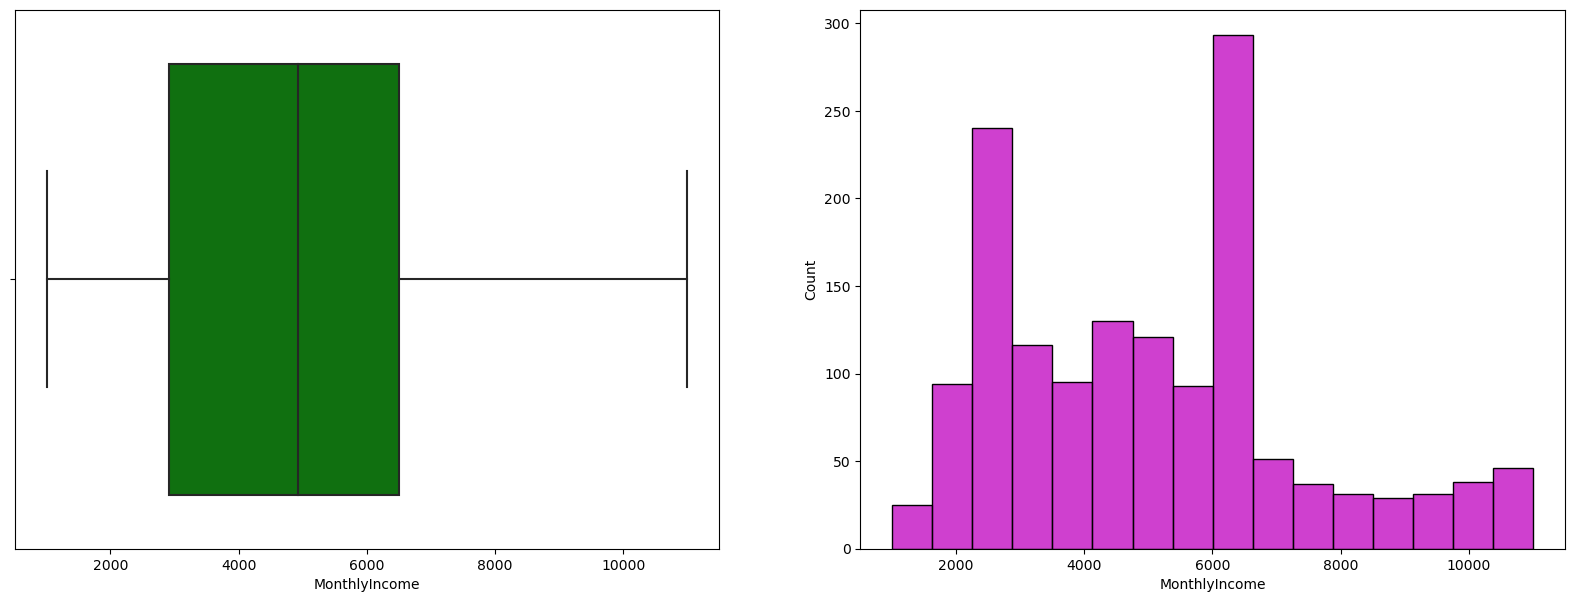

In [65]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["MonthlyIncome"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["MonthlyIncome"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

## ***Interpretation: Most likely, Employee's Monthly Income follows normal distribution with slightly right tailed. Most of the  company employee's income are in between 2000 and 6500
